In [8]:
import math

import jax.random
import numpy as np
from matplotlib import pyplot as plt

from vlgpax.model import Session
from vlgpax.kernel import RBF, RFF
from vlgpax import vi

Initializing
Initialized


c:\Users\asing\anaconda3\envs\lvmworkshop\lib\site-packages\vlgpax\vi.py:160: UserWarning: E: loss increased
  warnings.warn('E: loss increased')


EM Iteration 1, 	Loss = -2.6605, 	M step: 0.50s, 	E step: 3.33s
EM Iteration 2, 	Loss = -3.1658, 	M step: 0.27s, 	E step: 1.24s
EM Iteration 3, 	Loss = -3.1712, 	M step: 0.11s, 	E step: 1.17s
EM Iteration 4, 	Loss = -3.1747, 	M step: 0.10s, 	E step: 1.13s
EM Iteration 5, 	Loss = -3.1776, 	M step: 0.11s, 	E step: 1.15s
EM Iteration 6, 	Loss = -3.1802, 	M step: 0.10s, 	E step: 1.10s
EM Iteration 7, 	Loss = -3.1824, 	M step: 0.10s, 	E step: 1.12s
EM Iteration 8, 	Loss = -3.1844, 	M step: 0.10s, 	E step: 1.13s
EM Iteration 9, 	Loss = -3.1861, 	M step: 0.10s, 	E step: 1.13s
EM Iteration 10, 	Loss = -3.1876, 	M step: 0.11s, 	E step: 1.11s
EM Iteration 11, 	Loss = -3.1890, 	M step: 0.10s, 	E step: 1.06s
EM Iteration 12, 	Loss = -3.1901, 	M step: 0.10s, 	E step: 1.04s
EM Iteration 13, 	Loss = -3.1912, 	M step: 0.10s, 	E step: 1.03s
EM Iteration 14, 	Loss = -3.1921, 	M step: 0.10s, 	E step: 1.02s
EM Iteration 15, 	Loss = -3.1929, 	M step: 0.10s, 	E step: 1.04s
EM Iteration 16, 	Loss = -3.1936, 

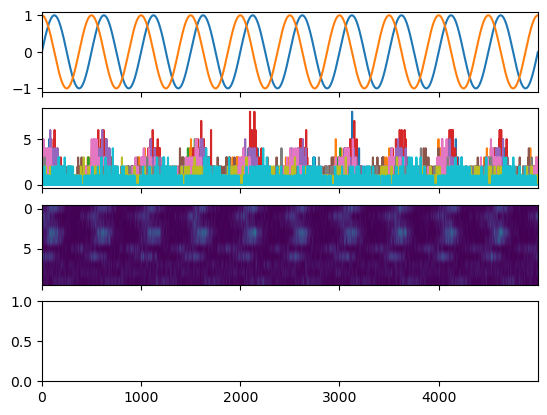

In [21]:
random_seed = 0
np.random.seed(random_seed)
# %% Generate 2D sine wave latent trajectory
dt = 2 * math.pi * 2e-3  # stepsize
T = 5000  # length
t = np.arange(T * dt, step=dt)  # time points
z = np.column_stack([np.sin(t), np.cos(t)])  # latent trajectory

# %% Generate Poisson observation
N = 10  # 10D
x = np.column_stack([z, np.ones(T)])  # Append a constant column for bias
C = np.random.randn(x.shape[-1],
                    N)  # Sample the loading matrix from Gaussian
C[-1, :] = -1.5  # less spikes per bin
r = np.exp(x @ C)  # firing rate
y = np.random.poisson(r)  # spikes

# %% Draw all
fig, ax = plt.subplots(4, 1, sharex='all')
ax[0].plot(z)  # latent
ax[1].plot(y)  # spikes
ax[2].imshow(y.T, aspect='auto')  # show spikes in heatmap

# %% Setup inference
ys = np.reshape(y,
                (10, T // 10, -1))  # Split the spike train into 10 trials
session = Session(dt)  # Construct a session.
# Session is the top level container of data. Two arguments, binsize and unit of time, are required at construction.
for i, y in enumerate(ys):
    session.add_trial(i + 1, y=y)  # Add trials to the session.
    
# %% Build the model
kernel = RBF(scale=1., lengthscale=100 * dt)  # RBF kernel
# key = jax.random.PRNGKey(0)
# kernel = RFF(key, 50, 1, scale=1., lengthscale=100 * dt)
session, params = vi.fit(session, n_factors=2, kernel=kernel, seed=random_seed, max_iter=50, GFPA=True)
# `fit` requires the target `session`, the number of factors `n_factors`, and the `kernel` function.
# `kernel` is a kernel function or a list of them corresponding to the factors.
# RBF kernel is implemented in `gp.kernel`. You may write your own kernels.

# Session supports direct access to the fields of trial. It concatenate the requested field of all the trials.
# After fitting, the following fields will be filled in each trial
# z: psoterior mean of latent factors, (T, factor)
# v: posterior variance of latent factors, (T, factor)
# w: needed to construct posterior covariance
# Note that the fit doesn't keep posterior covariance of each factor
# to save space, but they can be reconstructed.

# ax[3].plot(session.z)  # Draw the result
# plt.show()
# plt.close()

In [ ]:
ys[0]

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 2, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 1, ..., 0, 0, 0],
       [0, 2, 2, ..., 0, 1, 0],
       [0, 0, 0, ..., 1, 0, 0]])

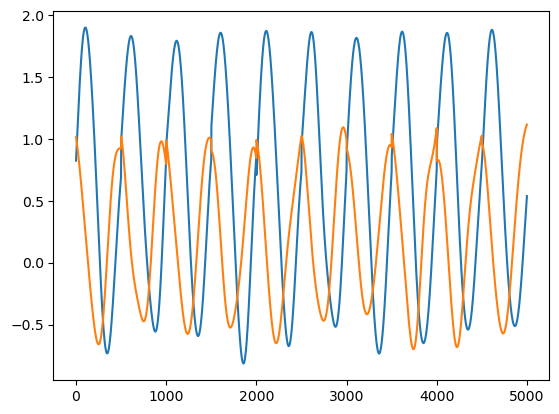

In [22]:
plt.plot(session.z)  # Draw the result
# plt.show(ax[3])

In [ ]:
session.z

DeviceArray([[0.8255582 , 1.01515928],
             [0.841146  , 1.01042627],
             [0.85681277, 1.00556587],
             ...,
             [0.51753219, 1.11356058],
             [0.5281129 , 1.11529982],
             [0.53854067, 1.11689266]], dtype=float64)

In [11]:
dr = Session()

In [12]:
dt

0.012566370614359173

In [18]:
for i in ys[0]:#.shape
    print(i)

[1 0 0 0 0 0 1 0 0 0]
[0 2 0 0 0 0 1 0 0 0]
[0 0 0 1 1 1 3 0 0 0]
[0 0 0 0 1 0 1 0 1 0]
[0 1 0 0 0 1 1 0 1 0]
[0 1 1 1 0 1 3 0 0 1]
[0 1 0 0 0 0 1 0 0 0]
[0 2 1 0 2 0 3 1 0 0]
[1 1 0 0 0 0 3 0 0 0]
[0 0 0 0 1 0 2 0 0 0]
[0 2 1 0 0 0 0 1 0 0]
[0 0 0 0 1 0 0 0 0 0]
[0 2 1 0 1 0 2 1 1 1]
[0 2 0 0 0 0 1 0 0 0]
[1 1 1 0 0 0 1 1 1 0]
[0 2 0 0 0 1 1 0 0 0]
[2 1 3 1 1 0 1 1 0 0]
[0 0 1 0 0 0 5 0 0 0]
[0 0 1 1 0 0 1 0 0 0]
[1 0 0 0 0 0 2 0 0 0]
[0 3 0 0 0 0 0 0 0 0]
[0 1 2 0 0 0 2 0 0 1]
[1 2 1 1 1 0 1 0 2 0]
[1 4 0 1 0 0 0 1 1 0]
[0 0 0 1 2 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 2]
[0 1 1 1 0 0 0 0 0 0]
[0 0 1 0 2 0 1 3 1 0]
[1 1 2 0 0 0 0 0 0 0]
[1 2 3 2 0 0 0 0 0 0]
[0 3 2 0 0 0 1 0 0 0]
[0 1 2 0 0 0 1 0 0 0]
[0 0 2 0 0 0 0 0 0 1]
[0 0 0 1 0 0 2 1 0 0]
[0 1 2 0 1 0 2 0 0 0]
[1 0 2 1 4 0 2 0 1 1]
[1 0 1 0 0 0 4 0 1 0]
[0 1 0 1 1 0 0 0 0 0]
[0 1 0 0 1 0 2 0 2 0]
[1 0 0 0 0 0 2 0 0 0]
[3 1 1 1 1 0 0 1 0 0]
[0 2 0 0 0 0 1 0 0 0]
[0 1 2 1 0 0 1 0 0 0]
[1 1 1 1 1 0 0 0 1 0]
[0 0 0 0 0 0 0 1 0 0]
[0 0 0 0 1

In [16]:
ys[0].shape

(500, 10)

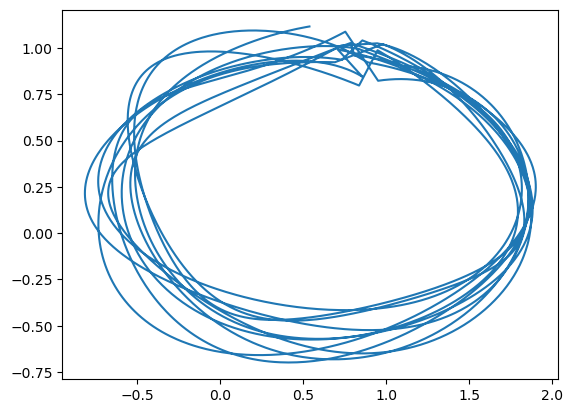

In [23]:
plt.plot(session.z[:, 0], session.z[:, 1])